# Import Necessary Packages

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Import Ratings Data

In [2]:
r=pd.read_csv('ratings.csv')

In [3]:
#size
r.shape

(5976479, 3)

In [4]:
#lets take a look at the dataset
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Text(0.5, 1.0, 'User Distribution by Rating')

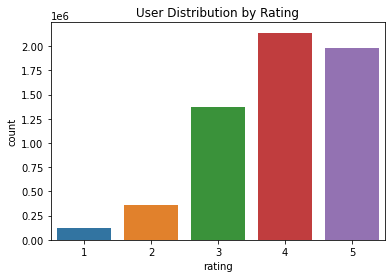

In [5]:
sns.countplot(x="rating", data=r)
plt.title('User Distribution by Rating')

- Since the dataset has 5976479 rows, there is a likelyhood that we will have memory error while modeling due to the processing capabiities with any personal computer for regular use.
- Lets see if we can filter out some of the data

# Check If All Users Rated Significant Number of  Books

In [6]:
# Number of ratings per user 
ratings_per_user = r.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)
ratings_per_user.head(10)

,user_id,rating
30943,30944,200
12873,12874,200
52035,52036,199
12380,12381,199
28157,28158,199
45553,45554,197
6629,6630,197
15603,15604,196
37833,37834,196
19728,19729,196


<ipython-input-7-d4dd693a36ee>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


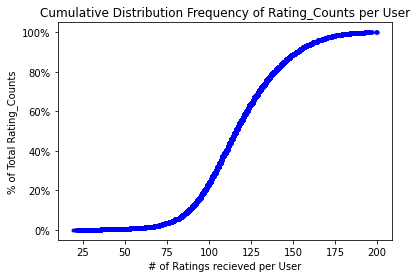

In [7]:
# A distribution of rating counts per user 
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    x = np.sort(array)  #sort array to use as the x axis  
    cdf = np.cumsum(np.sort(array))# Create an array that will store cumulative count value
    y = cdf/np.amax(cdf) #normalized the array 
    return x,y

fig, ax = plt.subplots()
x,y = ecdf(ratings_per_user.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('# of Ratings recieved per User');
ax.set_ylabel('% of Total Rating_Counts');
ax.set_title('Cumulative Distribution Frequency of Rating_Counts per User');

plt.show()
plt.show()


In [8]:
print('number of users giving no ratings',(ratings_per_user.rating ==0).astype(int).sum(axis = 0))
print('minimum number ratings provided by any user',min(ratings_per_user.rating))

number of users giving no ratings 0
minimum number ratings provided by any user 19


In [9]:
threshold_ratings_per_user = ratings_per_user [ratings_per_user['rating']<=40]
threshold_ratings_per_user.head(10)

,user_id,rating
43652,43653,40
36194,36195,40
26630,26631,40
22540,22541,40
30028,30029,40
43374,43375,40
50317,50318,40
37043,37044,40
35808,35809,40
23301,23302,40


In [10]:
print(threshold_ratings_per_user.shape)
print(ratings_per_user.shape)

(541, 2)
(53424, 2)


# Lets Filter Some Users who are Relatively Less Active

In [11]:
# Define a function to create a Boolean Mask 
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = False
    else:
        dataframe = True
    return dataframe

In [12]:
user_ids_with_low_review = list(set(threshold_ratings_per_user.user_id))
len(user_ids_with_low_review)

541

In [13]:
# Apply the function defined above to make a boolean mask based on user_ids_to_keep 
Filter = r.user_id.apply(lambda x:Filtered(x,user_ids_with_low_review))

In [14]:
# Use the boolean mask to filter data
r= r[Filter]
r.shape

(5959050, 3)

# Check if All Books Received Significant Number of Ratings 

In [15]:
# Number of ratings per book
ratings_per_book = r.groupby('book_id')['rating'].count().reset_index().sort_values('rating', ascending=False)
ratings_per_book.head()

,book_id,rating
0,1,22749
1,2,21753
3,4,19061
2,3,16835
4,5,16580


<ipython-input-16-6dc95bc6afd4>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


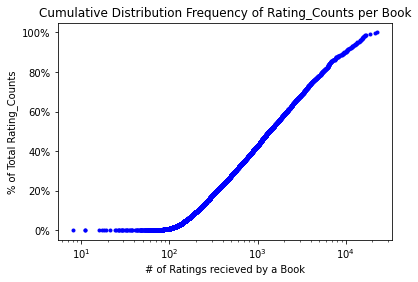

In [16]:
# A distribution by rating counts per book
fig, ax = plt.subplots()
x,y = ecdf(ratings_per_book.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xscale('log');
ax.set_xlabel('# of Ratings recieved by a Book');
ax.set_ylabel('% of Total Rating_Counts');
ax.set_title('Cumulative Distribution Frequency of Rating_Counts per Book');

plt.show()

In [17]:
print('number of books recieving zero ratings',(ratings_per_book.rating ==0).astype(int).sum(axis = 0))
print('minimum number ratings received by any book',min(ratings_per_book.rating))

number of books recieving zero ratings 0
minimum number ratings received by any book 8


In [18]:
threshold_ratings_per_book = ratings_per_book[ratings_per_book['rating']<=5000]
threshold_ratings_per_book.head()

,book_id,rating
203,204,4997
81,82,4913
194,195,4904
247,248,4884
138,139,4867


# Filtering Books that Did not Receive Significant Number of Reviews

In [19]:
book_ids_with_low_review = list(set(threshold_ratings_per_book.book_id))
len(book_ids_with_low_review)

9848

In [20]:
# Apply the function defined above to make a boolean mask based on book_ids_to_keep 
Filter = r.book_id.apply(lambda x:Filtered(x,book_ids_with_low_review))

In [21]:
# Use the boolean mask to filter data
r= r[Filter]

In [22]:
r.shape

(1310345, 3)

# Lets Import the Filtered Data into a CSV for Modeling

In [23]:
r.to_csv('ratings_filtered_data.csv', encoding = 'utf-8')